#### Recommendation System for E-commerce Platform

<div style="text-align: center;">
  <span style="color: #4A90E2; font-size: 35px; font-weight: bold;">Predicting your next perfect purchase</span>
  <hr style="border: 1px dashed grey; width: 80%;"/>
</div>
<p style="font-size: 20px; margin-top: 3px;">GitHub Link for project: <a href="https://github.com/AyushmanGHub/NextBuy-Predicting-your-next-perfect-purchase.">https://github.com/AyushmanGHub/NextBuy-Predicting-your-next-perfect-purchase.</a></p>

# **Next Buy : Predicting Your Next Perfect Product**

This project focuses on building a **Recommendation System for an E-commerce Platform** to enhance user experience by suggesting products. It integrates two major approaches to recommendation:  
(a) **Content-Based Filtering** — leveraging product descriptions.  
(b) **Collaborative Filtering** — utilizing user behavior, interactions, and ratings.

This project involves **Data Processing**, **Exploratory Data Analysis (EDA)**, **Model Training**, **Prediction**, and **Evaluation**. The performance of the system is measured using metrics such as **RMSE**, **Precision**, etc for assessing recommendation quality.

---

## **Methodologies Used**

### **(a) Content-Based Filtering: Using Product Descriptions**
This approach relies on product metadata to recommend items that are similar to what the user has interacted with previously.

- **Tools & Techniques**:  
  - **Cosine Similarity** or other similarity measures to compute distances between items based on their attributes.

- **Example**:  
  A user who has bought "wireless headphones" might be recommended "Bluetooth speakers" due to their similar features.

---

### **(b) Collaborative Filtering: Using User-Behavior Data**
This technique recommends items based on the past interactions of users and the behavior of other similar users.

- **Tools & Techniques**:  
  - Model 1. **Scikit-Surprise** for collaborative filtering model by SVD
  - Model 2. **Implicit Alternating Least Squares (ALS)** for advanced matrix factorization on sparse user-item interactions.

- **Example**:  
  If User A likes a product and User B likes the same product, User A might be recommended products liked by User B.


## --------------------------- (a) Content-Based Filtering: ---------------------------

### ------------------------ Importing needed Libraries ------------------------

In [1]:
import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import re

### ------------------------ Data Cleaning & Preprocessing ------------------------

In [2]:
with open("/content/drive/MyDrive/NextBuy-Predicting-your-next-perfect-purchase/ProductDescription.csv", "r", encoding="utf-8", errors="replace") as file:
    content = file.read()
ProductDescriptions = pd.read_csv(StringIO(content))
ProductDescriptions = ProductDescriptions.head(20000)
ProductDescriptions = ProductDescriptions.dropna()
print(ProductDescriptions.shape)
ProductDescriptions.reset_index(drop=True, inplace=True)
ProductDescriptions.head()


(20000, 5)


SnNo  Product_ID                                       Product_Name  \
0     2      100001                  Simpson Strong-Tie 12-Gauge Angle   
1     3      100001                  Simpson Strong-Tie 12-Gauge Angle   
2     9      100002  BEHR Premium Textured DeckOver 1-gal. #SC-141 ...   
3    16      100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   
4    17      100005  Delta Vero 1-Handle Shower Only Faucet Trim Ki...   

          Description  Relevance  
0       angle bracket       3.00  
1           l bracket       2.50  
2           deck over       3.00  
3    rain shower head       2.33  
4  shower only faucet       2.67

### ---------------------- Exploratory data Analysis -------------------------

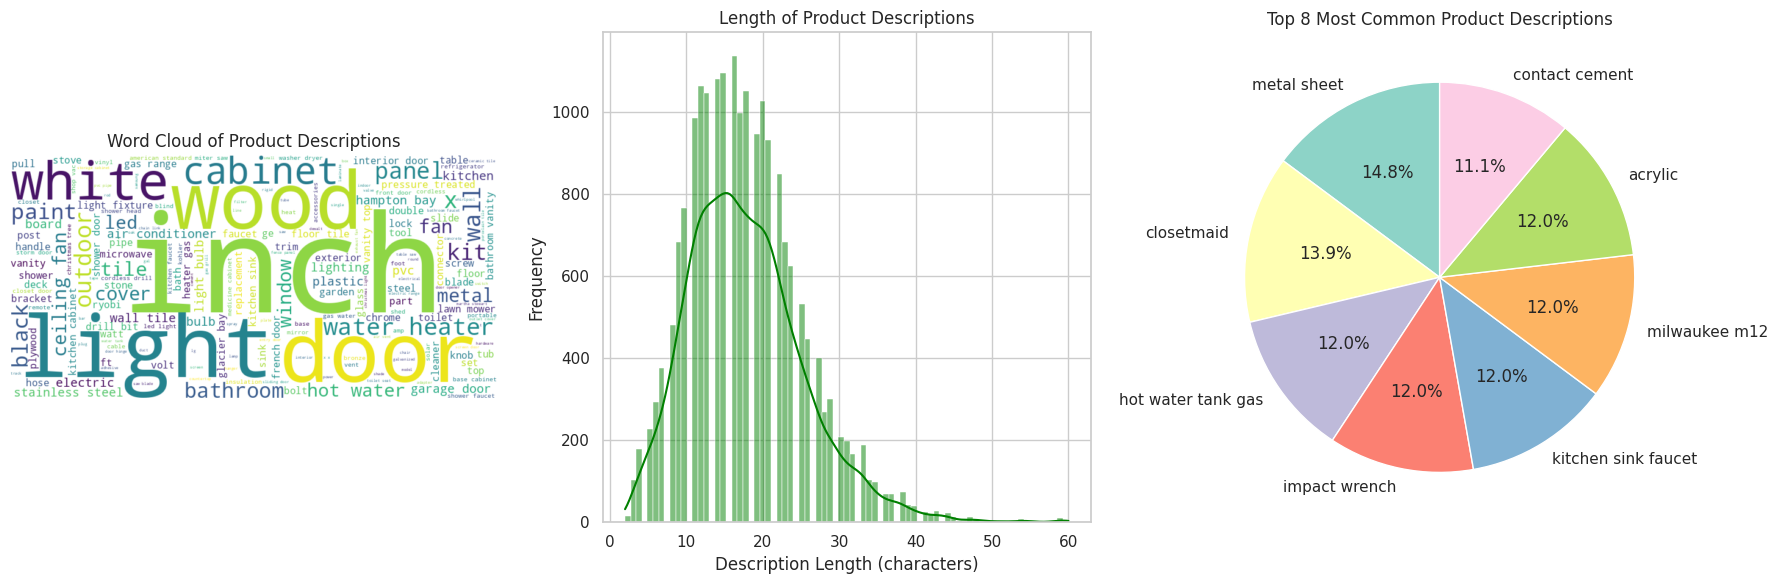

In [3]:

sns.set(style="whitegrid")

# Create a 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Word Cloud of all descriptions combined
all_descriptions = ' '.join(ProductDescriptions['Description'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

axes[0].imshow(wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Product Descriptions')

# 2. Length of Descriptions: Histogram of description lengths
ProductDescriptions['Description_Length'] = ProductDescriptions['Description'].apply(len)

sns.histplot(ProductDescriptions['Description_Length'], kde=True, color='green', ax=axes[1])
axes[1].set_title('Length of Product Descriptions')
axes[1].set_xlabel('Description Length (characters)')
axes[1].set_ylabel('Frequency')

# 3. Top N most common descriptions: Pie chart
description_counts = ProductDescriptions['Description'].value_counts().reset_index()
description_counts.columns = ['Description', 'Frequency']
top_descriptions = description_counts.head(8)

axes[2].pie(top_descriptions['Frequency'], labels=top_descriptions['Description'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_descriptions)))
axes[2].set_title('Top 8 Most Common Product Descriptions')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


### ------------------- Training the Model ----------------------

In [4]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(ProductDescriptions['Description'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

### ------------------------------ Evaluation ---------------------------------

In [5]:
# Function to get recommendations based on a given product's index
def recommend_products(product_index, cosine_sim, ProductDescriptions):
    # Get pairwise similarity scores for the product
    sim_scores = list(enumerate(cosine_sim[product_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    product_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar product names and their descriptions
    recommendations = ProductDescriptions.iloc[product_indices][['Product_Name', 'Description']]
    return recommendations

# Example: Get recommendations for the first product (index 0)
recommended_products = recommend_products(0, cosine_sim,ProductDescriptions)
print(recommended_products)

                                           Product_Name    Description
1212                  Simpson Strong-Tie 12-Gauge Angle  angle bracket
1229  Everbilt 1-1/2 in. Zinc-Plated Corner Brace (4...  angle bracket
1402  Everbilt 1 in. Zinc-Plated Corner Brace (20-Pack)  angle bracket
1953  Crown Bolt 1 in. x 72 in. Plain Steel Angle wi...  angle bracket
2624   Everbilt 3 in. Zinc-Plated Corner Brace (4-Pack)  angle bracket
2740  OWT Ornamental Wood Ties 45-Degree Flush Insid...  angle bracket
2895  Simpson Strong-Tie ZMAX 18-Gauge Galvanized St...  angle bracket
4108    Simpson Strong-Tie 16-Gauge Concrete Form Angle  angle bracket
5818  Simpson Strong-Tie Z-MAX 2 in. x 4 in. 12-Gaug...  angle bracket
5829  Superstrut 2-Hole 90�_ Angle Bracket - Silver ...  angle bracket


Precision: 0.61
Recall: 0.61


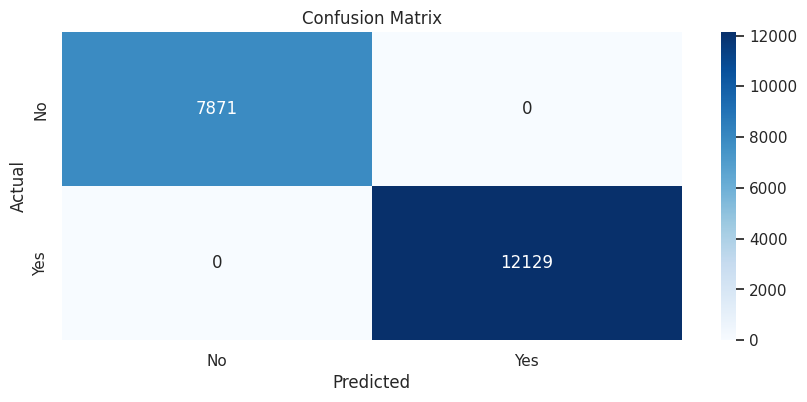

In [6]:
# Sample 10,000 random products for testing
test_df = ProductDescriptions.sample(n=5000, random_state=42)
test_df.reset_index(drop=True, inplace=True)


# Define the function to get recommendations based on cosine similarity
def recommend(product_index, cosine_sim, df, top_n=5):
    if product_index >= len(df):
        raise IndexError(f"product_index {product_index} is out of bounds for the DataFrame")

    sim_scores = list(enumerate(cosine_sim[product_index]))

    # Sorting the products based on similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting the indices of the top N most similar products (excluding the input product itself)
    sim_scores = sim_scores[1:top_n+1]
    recommended_indices = [i[0] for i in sim_scores]

    return df.iloc[recommended_indices]['Product_ID'].tolist()


def is_recommended_correctly(recommended_product_ids, product_id, df):
    return 1 if product_id in recommended_product_ids else 0


def calculate_metrics(df, cosine_sim, top_n=5):
    true_labels = []
    predictions = []

    for _, row in df.iterrows():
        original_product_id = row['Product_ID']
        product_index = row.name

        if product_index >= len(cosine_sim):
            print(f"Skipping product {original_product_id} because its index is out of bounds.")
            continue

        recommended_product_ids = recommend(product_index, cosine_sim, df, top_n=top_n)

        true_label = is_recommended_correctly(recommended_product_ids, original_product_id, df)
        true_labels.append(true_label)

        # Predictions for RMSE ( 1 for correct recommendations, 0 for incorrect ones)
        predictions.append(true_label)

    # Calculate Precision and Recall
    true_positives = sum(true_labels)
    false_positives = len(true_labels) - true_positives
    false_negatives = len(true_labels) - true_positives

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    return precision, recall, true_labels, predictions

precision, recall, true_labels, predictions = calculate_metrics(ProductDescriptions, cosine_sim, top_n=5)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

cm = confusion_matrix(true_labels, predictions)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




---



## ------------------(b) Collaborative Filtering -------------------

### ---------------------------------------  Importing Needed Libraries --------------------------------------

In [7]:
pip install scikit-surprise

In [8]:
pip install implicit

In [9]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import implicit
import random
from scipy.sparse import csr_matrix

### ------------------ Data Cleaning & Preprocessing --------------------

In [10]:
df = pd.read_csv("/content/drive/MyDrive/NextBuy-Predicting-your-next-perfect-purchase/ProductRating.csv")
df = df.drop('Timestamp', axis=1)

In [11]:
counts = df['UserId'].value_counts()
df_filtered = df[df['UserId'].isin(counts[counts >= 50].index)]
print('The number of observations in the final data =', len(df_filtered))
print('Number of unique USERS in the final data = ', df_filtered['UserId'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_filtered['ProductId'].nunique())

The number of observations in the final data = 29559
Number of unique USERS in the final data =  361
Number of unique PRODUCTS in the final data =  17228


In [12]:
# Interactive bar plot for UserId (Top 30)
user_counts = df['UserId'].value_counts().head(50)
fig_user = px.bar(user_counts, x=user_counts.index, y=user_counts.values,
                  labels={'x': 'UserId', 'y': 'Count'},
                  title="Top 50 UserIds Distribution",
                  color=user_counts.values,
                  color_continuous_scale='Viridis')
fig_user.update_traces(marker=dict(line=dict(color='black', width=1)))
fig_user.show()

product_counts = df['ProductId'].value_counts().head(50)
fig_product = px.bar(product_counts, x=product_counts.index, y=product_counts.values,
                     labels={'x': 'ProductId', 'y': 'Count'},
                     title="Top 50 ProductIds Distribution",
                     color=product_counts.values,
                     color_continuous_scale='Cividis')
fig_product.update_traces(marker=dict(line=dict(color='black', width=1)))
fig_product.show()


In [13]:
# Create a figure
fig_histograms = go.Figure()

fig_histograms.add_trace(
    go.Histogram(
        x=df['Rating'],
        nbinsx=10,
        marker=dict(color='#636EFA', line=dict(color='black', width=1))
    )
)

fig_histograms.update_layout(
    title="Distribution of Ratings",
    xaxis_title="Rating",
    yaxis_title="Count"
)

fig_histograms.show()

### ------------------------------ SVD model for collaborative ltering ------------------------------

In [14]:
reader = Reader(rating_scale=(1, 5))

surprise_data = Dataset.load_from_df(df_filtered[["UserId", "ProductId", "Rating"]], reader)
trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=42)

# Define the SVD model
model = SVD()
model.fit(trainset)

In [15]:
# Function to recommend products for a given UserId
def recommend_products(user_id, model, trainset, n=5):
    product_ids = df["ProductId"].unique()

    # Predict ratings for all products not rated by the user
    user_products = trainset.ur[trainset.to_inner_uid(user_id)] if user_id in trainset.ur else []
    rated_products = [trainset.to_raw_iid(iid) for iid, _ in user_products]
    unrated_products = [pid for pid in product_ids if pid not in rated_products]

    predictions = [ (product, model.predict(user_id, product).est) for product in unrated_products ]

    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n]

In [16]:
# Recommend top 5 products for user 'A22ZFXQE8AWPEP'
user_id = "A22ZFXQE8AWPEP"
recommendations = recommend_products(user_id, model, trainset)
print(f"Top recommendations for user {user_id}: {recommendations}")

Top recommendations for user A22ZFXQE8AWPEP: [('B0023BXQXM', 4.052502362610566), ('B0027895F4', 3.906055141871158), ('B0011ULXB8', 3.820161911309243), ('B002PU7C4K', 3.8020247364072484), ('B005IGXJTA', 3.786543707576517)]


In [17]:
# Generate predictions for the testset
predictions = model.test(testset)

rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

# Precision Calculation (Precision@k)
def precision_at_k(predictions, k=10, threshold=1):
    """Compute precision at k for the predictions."""
    user_est_true = {}
    for uid, iid, true_r, est, _ in predictions:
        user_est_true.setdefault(uid, []).append((est, true_r))

    precisions = []
    for uid, user_ratings in user_est_true.items():
        # Sort predictions by estimated rating in descending order
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Take top k predictions
        top_k = user_ratings[:k]
        # Calculate precision
        relevant = sum((true_r >= threshold) for _, true_r in top_k)
        precisions.append(relevant / k)

    return sum(precisions) / len(precisions)

# Calculate precision@k
precision = precision_at_k(predictions, k=10)

# Accuracy Calculation (Hit Ratio or Top-k Accuracy)
def accuracy_at_k(predictions, k=10, threshold=1):
    """Compute accuracy at k for the predictions (hit ratio)."""
    user_est_true = {}
    for uid, iid, true_r, est, _ in predictions:
        user_est_true.setdefault(uid, []).append((est, true_r))

    hits = 0
    for uid, user_ratings in user_est_true.items():
        # Sort predictions by estimated rating in descending order
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        # Take top k predictions
        top_k = user_ratings[:k]
        # Count hits (relevant product in the top k)
        if any(true_r >= threshold for _, true_r in top_k):
            hits += 1

    # Return hit ratio (accuracy at k)
    return hits / len(user_est_true)

# Calculate accuracy@k
accuracy_k = accuracy_at_k(predictions, k=10)

# Print results
print(f"Precision@10: {precision}")
print(f"Accuracy@10 (Hit Ratio): {accuracy_k}")


RMSE: 1.0551
MAE:  0.8002
Precision@10: 0.9692520775623262
Accuracy@10 (Hit Ratio): 1.0


# ------------------------------------------------------------------------------
### ---------- Alternating Least Squares (ALS) for collaborative ltering ----------

In [18]:
# Convert DataFrame to matrix format (user-item matrix)
df_filtered['Rating'] = df_filtered['Rating'].astype(float)  # Ensure ratings are floats

# Prepare the data for implicit (convert UserId and ProductId to index)
user_mapping = {user: idx for idx, user in enumerate(df_filtered['UserId'].unique())}
item_mapping = {item: idx for idx, item in enumerate(df_filtered['ProductId'].unique())}

df_filtered['UserId'] = df_filtered['UserId'].map(user_mapping)
df_filtered['ProductId'] = df_filtered['ProductId'].map(item_mapping)

# Create the user-item interaction matrix (matrix of ratings)
user_item_matrix = df_filtered.pivot(index='UserId', columns='ProductId', values='Rating').fillna(0)

# Convert to a sparse matrix (necessary for implicit)
user_item_matrix = csr_matrix(user_item_matrix.values)

# Train the ALS model using implicit
model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=100)
model.fit(user_item_matrix)


<ipython-input-18-fc13da84acec>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-fc13da84acec>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-fc13da84acec>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10

  0%|          | 0/100 [00:00<?, ?it/s]

In [19]:
# Generate top-N recommendations for each user using the ALS model
def get_top_n_recommendations(model, user_item_matrix, n=100):
    recommendations = {}

    # For each user, get the top n recommendations
    for user_id in range(user_item_matrix.shape[0]):
        recommended_items = model.recommend(user_id, user_item_matrix[user_id], N=n)
        recommendations[user_id] = [item[0] for item in recommended_items]  # Extract product IDs

    return recommendations

# Get top 5 recommendations for each user
top_n_recommendations = get_top_n_recommendations(model, user_item_matrix, n=5)
print(top_n_recommendations )

{0: [16591, 0.6475614], 1: [8062, 0.1765735], 2: [10400, 0.60254174], 3: [3892, 0.5538122], 4: [262, 0.42490825], 5: [11396, 0.38215378], 6: [6587, 0.8563848], 7: [7616, 0.7768203], 8: [9837, 0.6260998], 9: [4498, 0.6749737], 10: [3733, 0.48344192], 11: [7435, 0.1500071], 12: [10019, 0.44596764], 13: [7977, 0.6302229], 14: [6926, 0.55717385], 15: [361, 0.30199918], 16: [12582, 0.8659965], 17: [7164, 0.63844573], 18: [11818, 0.7161498], 19: [1111, 0.6879968], 20: [1969, 0.6073346], 21: [361, 0.49403408], 22: [6517, 0.5979556], 23: [300, 0.47607946], 24: [14601, 0.98064405], 25: [8684, 0.38701305], 26: [16573, 0.8060444], 27: [4028, 0.42913905], 28: [14421, 0.95093125], 29: [11622, 0.53469896], 30: [971, 0.5458217], 31: [4161, 0.548951], 32: [9129, 0.60856235], 33: [15080, 0.47287682], 34: [9606, 0.5304756], 35: [9605, 0.4478317], 36: [12267, 0.5849059], 37: [14582, 0.74425375], 38: [3680, 0.35677907], 39: [11203, 0.6397001], 40: [1030, 0.4711759], 41: [7616, 0.45235416], 42: [6329, 0.60

In [20]:
# Function to get recommendations for a specific user ID
def get_user_recommendations(user_id, model, user_item_matrix, n=2):
    """Generate top-N recommendations for a specific user."""
    recommended_items = model.recommend(user_id, user_item_matrix[user_id], N=n)
    return recommended_items

# Select two random user IDs from the dataset
random_user_ids = random.sample(df_filtered['UserId'].unique().tolist(), 4)

# Get recommendations for each random user
for user_id in random_user_ids:
    recommended_items = get_user_recommendations(user_id, model, user_item_matrix, n=2)  # Request recommendation
    print(f"Recommendations for User {user_id}:")
    for rec in recommended_items:
        item_id, score = rec[0], rec[1]  # Unpack the item ID and score from the tuple

        # Check if the item_id exists in the item_mapping and handle if not
        if item_id in item_mapping.values():
            # Reverse the product ID mapping to get the original ProductId
            original_product_id = [key for key, value in item_mapping.items() if value == item_id][0]
            print(f"Product ID: {original_product_id}")
    print("\n")


Recommendations for User 354:
Product ID: B00IRMZ6S4


Recommendations for User 173:
Product ID: B000AO2NXS


Recommendations for User 4:
Product ID: B00008CMOQ


Recommendations for User 307:
Product ID: B001OMI93S




## Conclusion
In conclusion, this recommendation system project successfully demonstrated two approaches: Content-Based Filtering and Collaborative Filtering, to suggest relevant products to users on an e-commerce platform. The Content-Based Filtering utilized product descriptions to match user preferences, while the Collaborative Filtering model leveraged user behaviors and ratings for personalized recommendations. Evaluation metrics such as RMSE, Precision@10, and Accuracy@10 showed promising results, with high precision and accuracy, ensuring that the recommendations align closely with user expectations. This project highlights the effectiveness of both methods in enhancing user experience and product discovery on e-commerce platforms.